# 0. Tips data EDA (*)
In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the load_dataset method in seaborn module. The goal will be to use polynomial linear regression to predict tips.
####  * a) Start by doing some initial EDA such as info(), describe().
####  * b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).
####  * c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate.
####  * d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import ssl
ssl._create_default_https_context = ssl._create_unverified_context



df = sns.load_dataset("tips")
print(df.info(), df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None        total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


## b)

<Axes: >

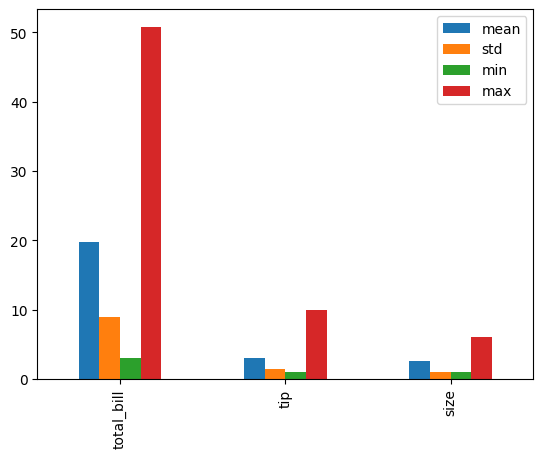

In [27]:
df.describe().T.drop(["count","25%","50%","75%"],axis="columns").plot(kind="bar")

## * c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate.

In [28]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/var/folders/q6/3g_x1fsd1gj1bssql2_z81c40000gn/T/ipykernel_29117/345414697.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips_per_day = df.groupby("day").sum()


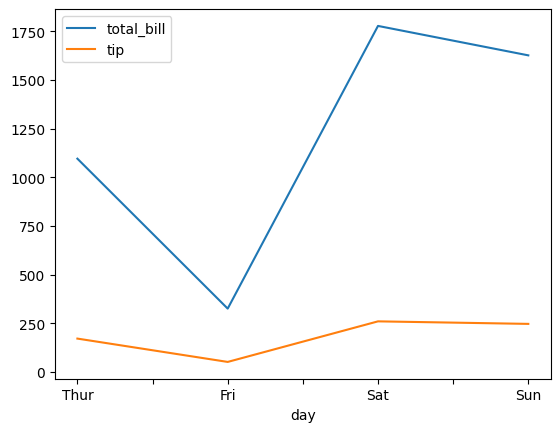

In [32]:
# Which day is the day they get the most tip? 

tips_per_day = df.groupby("day").sum()

tips_per_day.drop("size", axis="columns").plot(kind="line");

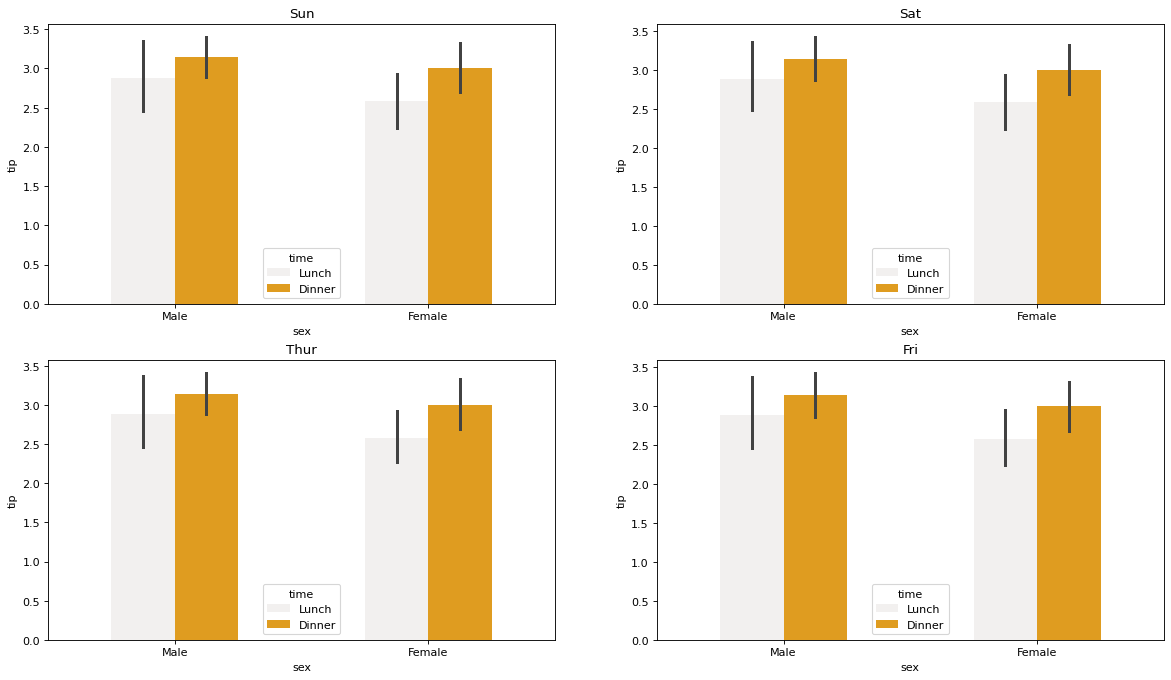

In [61]:
fig= plt.figure(dpi=80,figsize=(18, 10))
for i, day in enumerate(df['day'].unique()):
    ax=plt.subplot(2,2,i+1)
    sns.barplot(data =df, x='sex', y='tip', hue= "time", width= .5, color='orange')
    ax.set_title(day)


####  * d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

## 1. Train|test split (*)
Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

In [38]:
from sklearn.model_selection import train_test_split

y_df = df["tip"]
X_df = df.drop("tip",axis="columns")

X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.3,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((170, 6), (74, 6), (170,), (74,))

## 2. Feature standardization (*)

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?